# 0. Loading libraries

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# 1. Create a toy dataset

In [14]:
# We will use sklearn's make_classification to create a toy dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


# 2. Preprocess the dataset

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
print('ready')

ready


# 3. Define a neural network model

In [5]:

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 50
num_classes = 2
num_epochs = 100
learning_rate = 0.001

# Model
model = SimpleNN(input_size, hidden_size, num_classes)

# 4. Define loss function and optimizer

In [6]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 5. Train the model

In [10]:

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Track the training loss
    train_losses.append(loss.item())
    
    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')




Epoch [10/100], Loss: 0.2992, Test Loss: 0.3767
Epoch [20/100], Loss: 0.2850, Test Loss: 0.3681
Epoch [30/100], Loss: 0.2732, Test Loss: 0.3614
Epoch [40/100], Loss: 0.2632, Test Loss: 0.3563
Epoch [50/100], Loss: 0.2545, Test Loss: 0.3523
Epoch [60/100], Loss: 0.2468, Test Loss: 0.3493
Epoch [70/100], Loss: 0.2399, Test Loss: 0.3475
Epoch [80/100], Loss: 0.2335, Test Loss: 0.3465
Epoch [90/100], Loss: 0.2275, Test Loss: 0.3463
Epoch [100/100], Loss: 0.2217, Test Loss: 0.3468


# 6. Evaluate the model

Training Accuracy: 0.9200
Test Accuracy: 0.8450


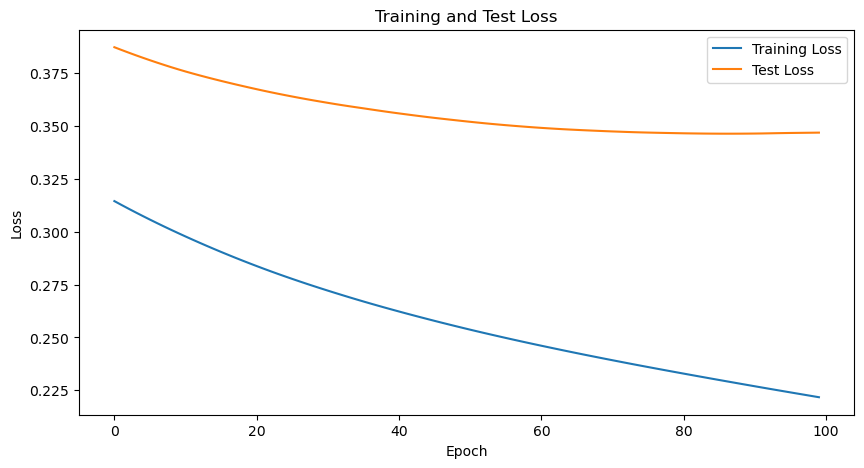

In [12]:

with torch.no_grad():
    model.eval()
    train_pred = torch.argmax(model(X_train), dim=1)
    test_pred = torch.argmax(model(X_test), dim=1)
    
    train_accuracy = (train_pred == y_train).sum().item() / y_train.size(0)
    test_accuracy = (test_pred == y_test).sum().item() / y_test.size(0)
    
    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

# 7. Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()